### Reading and understanding the data

In [1]:
###Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("day (1).csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
####Dropping the instant and dteday column as it is of no significance
df.drop(["instant"],axis=1,inplace=True)
df.drop(["dteday"],axis=1,inplace=True)

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


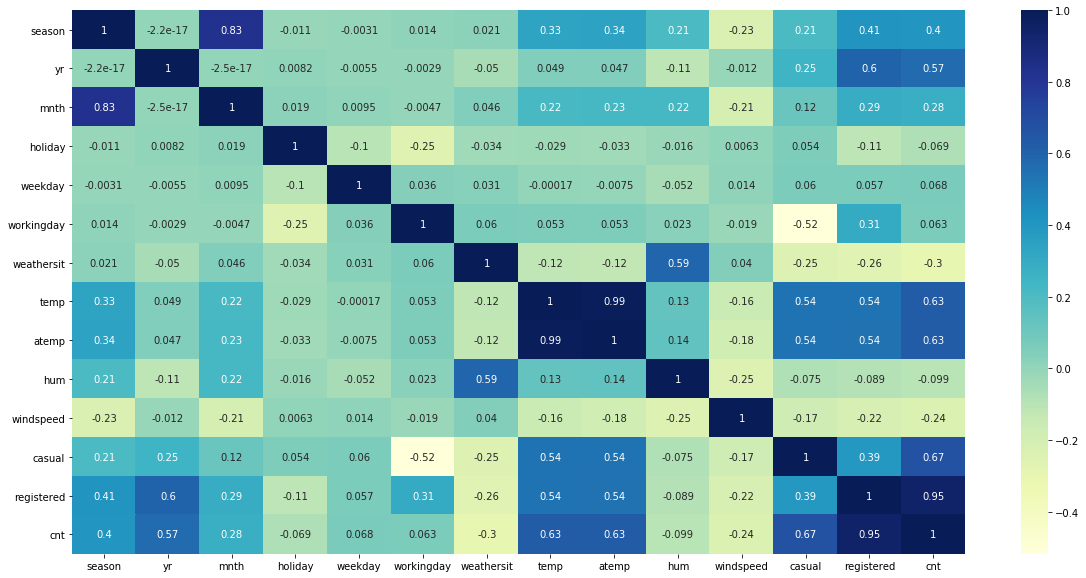

In [10]:
###Checking the correlation between the variables 
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

As we can see the variables atemp and temp are highly correlated having correlation coefficient of 0.99 , so we can drop either of the the two variables to make our model less complex

In [11]:
#### Now dropping the variable atemp from the dataframe
df.drop(["atemp"],axis=1,inplace=True)

In [12]:
####Also dropping the variable "casual" and "registered " as they have been added up to get the Target variable "cnt"
df.drop(["casual"],axis=1,inplace=True)
df.drop(["registered"],axis=1,inplace=True)

In [13]:
####Checking the head again
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [14]:
####Checking the unique values in "season" column
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [15]:
###Checking the unique values in"weathersit" column
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [16]:
###Checking the unique values of "weekday" column
df.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [17]:
####Checking the unique values of "mnth" column
df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [18]:
### Defining a function to convert  the values(1,2,3,4) in season column into category(spring,summer,fall,winter)

def season_map(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    else:
        return "winter"
    

In [19]:
###Defining a function to convert  the values(1,2,3) in weathersit column into category(Clear,Mist,Light Snow)
def weather_map(x):
    if x==1:
        return "Clear"
    elif x==2:
        return "Mist"
    else:
        return "Light Snow "

In [20]:
###Defining a function to convert  the values(0,1,2,3,4,5) in weekday column into category(Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday)

def weekday_map(x):
    if x==0:
        return "Sunday"
    elif x==1:
        return "Monday"
    elif x==2:
        return "Tuesday"
    elif x==3:
        return "Wednesday"
    elif x==4:
        return "Thursday"
    elif x==5:
        return "Friday"
    else:
        return "Saturday"

In [21]:
###Defining a function to convert the "mnth" variable into categorical variable
def mnth_map(x):
    if x==1:
        return "Jan"
    elif x==2:
        return "Feb"
    elif x==3:
        return "Mar"
    elif x==4:
        return "Apr"
    elif x==5:
        return "May"
    elif x==6:
        return "June"
    elif x==7:
        return "July"
    elif x==8:
        return "Aug"
    elif x==9:
        return "Sep"
    elif x==10:
        return "Oct"
    elif x==11:
        return "Nov"
    else:
        return "Dec"

In [22]:
####Checking the head now
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [23]:
###Applying the above function
df["season"] = df["season"].apply(season_map)

In [24]:
###Applying the function 
df["weathersit"] = df["weathersit"].apply(weather_map)

In [25]:
df["weekday"] = df["weekday"].apply(weekday_map)

In [26]:
df["mnth"] = df["mnth"].apply(mnth_map)

In [27]:
###Checking the head( ) after applying the function
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


# Visualising the numeric variables

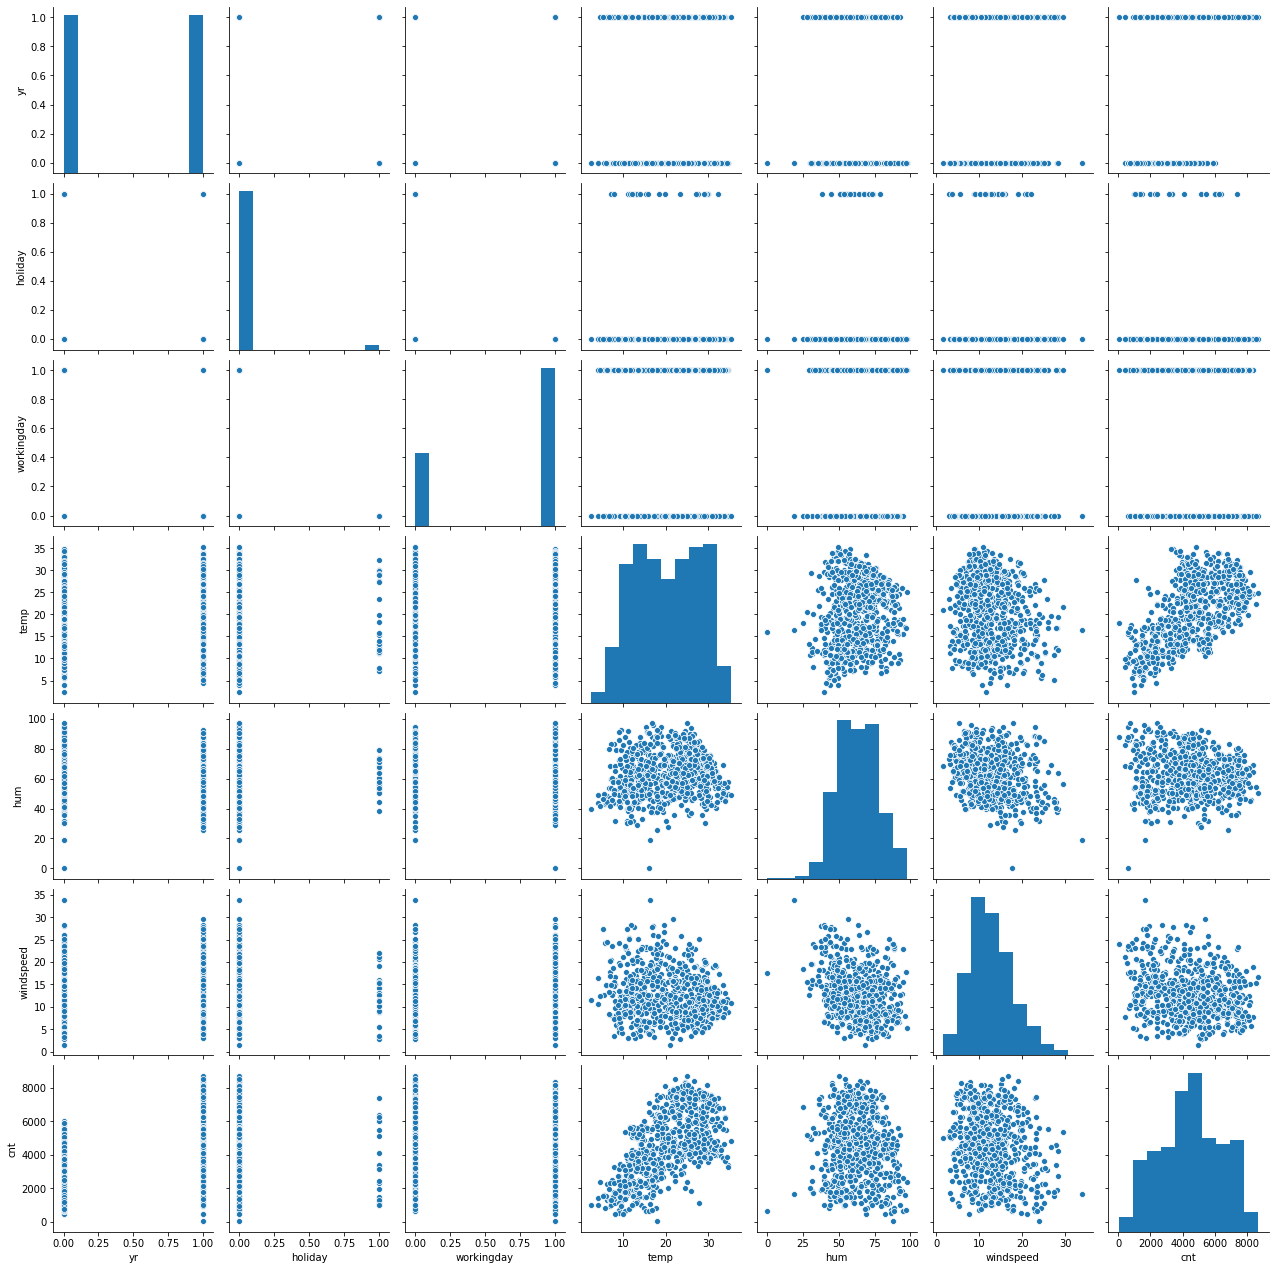

In [28]:
sns.pairplot(df)
plt.show()

In [29]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


Now ,lets make boxplot for the categorical variables

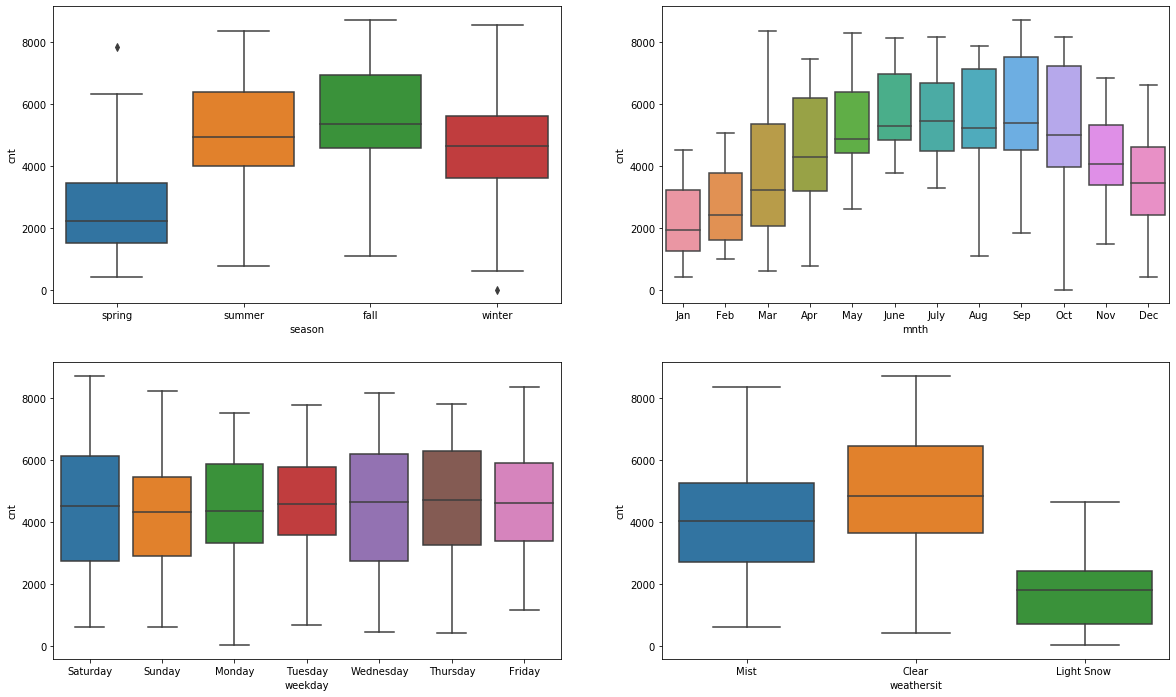

In [30]:
plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.show()

Converting the season variable into dummy variable

In [31]:
season_dummy = pd.get_dummies(df.season,prefix = "season").iloc[:,1:]


In [32]:
season_dummy.head()

,season_spring,season_summer,season_winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [33]:
####Now concatenating the dummy variables with the main dataframe 
df = pd.concat([df,season_dummy],axis=1)

In [34]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [35]:
####Since it contains only three categorical variables("Clear","Mist","Light Snow") so it must contain 2 dummy variables 
weathersit_dummy = pd.get_dummies(df.weathersit,prefix="weather").iloc[:,1:]

In [36]:
weathersit_dummy.head()

,weather_Light Snow,weather_Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [37]:
####Now concatanating the weathersit_dummy with the main dataframe

df = pd.concat([df,weathersit_dummy],axis=1)

In [38]:
###Checking the head again after concatanating
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weather_Light Snow,weather_Mist
0,spring,0,Jan,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [39]:
####Now dropping the "season" and "weathersit" column 
df.drop(["weathersit"],axis=1,inplace=True)
df.drop(["season"],axis=1,inplace=True)

In [40]:
###Checking the head again
df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weather_Light Snow,weather_Mist
0,0,Jan,0,Saturday,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,Jan,0,Sunday,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,Jan,0,Monday,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,Jan,0,Tuesday,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,Jan,0,Wednesday,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [41]:
###Getting the dummy for the weekday variable
weekday_dummy = pd.get_dummies(df.weekday,prefix="weekday").iloc[:,1:]

In [42]:
df = pd.concat([df,weekday_dummy],axis=1)

In [43]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weather_Light Snow,weather_Mist,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,Jan,0,Saturday,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0
1,0,Jan,0,Sunday,0,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0
2,0,Jan,0,Monday,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0
3,0,Jan,0,Tuesday,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0
4,0,Jan,0,Wednesday,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1


In [44]:
####Dropping the weekday column ,as dummy has been created for that
df.drop(["weekday"],axis=1,inplace=True)

In [45]:
df.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weather_Light Snow,weather_Mist,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0,Jan,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0
1,0,Jan,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0
2,0,Jan,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0
3,0,Jan,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0
4,0,Jan,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1


In [46]:
###Creating the dummy variable for the "mnth" variable 
mnth_dummy = pd.get_dummies(df.mnth,prefix="mnth").iloc[:,1:]
mnth_dummy.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [47]:
df = pd.concat([df,mnth_dummy],axis=1)

In [48]:
df.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,Jan,0,0,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,0,14.902598,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
df.drop(["mnth"],axis=1,inplace=True)

In [50]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter',
       'weather_Light Snow ', 'weather_Mist', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep'],
      dtype='object')

In [51]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# Now splitting the data into training and test set

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
#We specify this so that the train and test set always have the same rows
np.random.seed(0)

#Divinding the dataframe into train and test set
df_train,df_test = train_test_split(df,train_size = 0.7,test_size = 0.3,random_state = 100)

In [54]:
df_train.shape

(510, 29)

In [55]:
df_test.shape

(219, 29)

# Rescaling the features

It is very important to rescale the variables so that all the independent variables have comparable scale .If we don't have comparable scale ,then during the model building for some variables the coefficient can be very large or very small as compared to the other coefficients .So ,we will use Min-Max scaling to rescale the variables

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler() #Creating an instance

In [58]:
#Applying scaler() to all the numeric column except the dummy variables and the columns having binary values

num_vars = ["temp","hum","windspeed" ,"cnt"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [59]:
##Checking the head now
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing the training set into x_train and y_train

In [61]:
y_train = df_train.pop("cnt")
x_train = df_train

# Building the model

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

# RFE

Recursive Feature Elimination

In [62]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [63]:
## Running RFE with output number opf variables equal to 15
lm = LinearRegression()   #Creating an instance 
lm.fit(x_train,y_train)

rfe = RFE(lm,15)
rfe= rfe.fit(x_train,y_train)


In [64]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weather_Light Snow ', True, 1),
 ('weather_Mist', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 12),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1)]

In [65]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weather_Light Snow ', 'weather_Mist', 'weekday_Saturday', 'mnth_Jan',
       'mnth_July', 'mnth_Sep'],
      dtype='object')

In [66]:
x_train.columns[~rfe.support_]

Index(['weekday_Monday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov',
       'mnth_Oct'],
      dtype='object')

Now we have find the top variables to take from the dataset based on RFE ,lets now find the statistics of this model 

# Building the model using statsmodel,for the statistics part of it

In [67]:
##Creating x_train based on RFE selected variables
x_train_rfe = x_train[col]

In [ ]:
###Adding a constant variable
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

In [ ]:
###Fitting the best fit line
lm = sm.OLS(y_train,x_train_rfe).fit()

In [ ]:
###Let's see the summary of our model
print(lm.summary())

# Checking the VIFs of the model

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x_train_rfe.columns

In [ ]:
x = x_train_rfe.drop(['const'],axis=1)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Now we will first remove those variables having high p-value ,i,e p-value>0.05 which are insignificant because it is possible that the VIF values might decrease after dropping the variables having high p-value

In [ ]:
x_train_rfe.columns

In [ ]:
##Dropping the variables "holiday","season_spring","mnth_jan" as they have p-values > 0.05
x_train_rfe.drop(["holiday"],axis=1,inplace=True)
x_train_rfe.drop(["season_spring"],axis=1,inplace=True)
x_train_rfe.drop(["mnth_Jan"],axis=1,inplace=True)



In [ ]:
###Checking the column again after dropping
x_train_rfe.columns

Rebuilding a new model based on the remaining variables 

In [ ]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)

###Fitting the model
lm = sm.OLS(y_train,x_train_rfe).fit()

In [ ]:
##Checking the summary of the model
print(lm.summary())


In [ ]:
x = x_train_rfe.drop(["const"],axis=1)

In [ ]:
####Checking the VIF again

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Now the variable "mnth_July" is having high p-value , lets drop the variable

In [ ]:
x_train_rfe.drop(["mnth_July"],axis=1,inplace=True)

In [ ]:
x_train_rfe.drop(["const"],axis=1,inplace=True)

In [ ]:
x_train_rfe.columns

In [ ]:
####Rebuilding the model again based on the remaining variables

x_train_rfe = sm.add_constant(x_train_rfe)

###Fitting the model

lm = sm.OLS(y_train,x_train_rfe).fit()

In [ ]:
###Checking the summary of the model again

print(lm.summary())

Now all the variables seems to be significant ,lets now check for the VIF values

In [494]:
x = x_train_rfe.drop(["const"],axis=1)

In [495]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.98
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
8,weather_Mist,2.10
0,yr,2.02
9,weekday_Saturday,1.79
6,season_winter,1.66
5,season_summer,1.58
10,mnth_Sep,1.20


Now the variables "hum" have very high VIF values ,so we should drop these variables

In [496]:
x_train_rfe.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'weather_Light Snow ', 'weather_Mist',
       'weekday_Saturday', 'mnth_Sep'],
      dtype='object')

In [497]:
x_train_rfe.drop(['hum'],axis=1,inplace=True)

In [498]:
x_train_rfe_new = x_train_rfe.drop(['const'],axis=1)

In [499]:
####Again rebuildin a model based on the remaining variables

x_train_rfe_new = sm.add_constant(x_train_rfe_new)

###Fitting the model
lm_2 = sm.OLS(y_train,x_train_rfe_new).fit()

In [503]:
####Check the summary now
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.47e-188
Time:                        17:46:21   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0753    

In [504]:
x = x_train_rfe_new.drop(["const"],axis=1)

In [505]:
####Check for the VIF values
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
8,weekday_Saturday,1.69
4,season_summer,1.57
7,weather_Mist,1.53
5,season_winter,1.40
9,mnth_Sep,1.20
6,weather_Light Snow,1.08


Now as we can see all our p-values are less than 0.05 and VIF values are less than 5 , so we can keep the model 

## Residual Analysis of the train data

In [506]:
###First we have to find the y_train_pred
y_train_pred = lm_2.predict(x_train_rfe_new)
y_train_pred

653    0.730240
576    0.771905
426    0.498372
728    0.340232
482    0.570484
         ...   
526    0.769014
578    0.810782
53     0.225784
350    0.262961
79     0.309907
Length: 510, dtype: float64

In [507]:
res = y_train - y_train_pred
res

653    0.134003
576    0.055753
426   -0.033116
728   -0.136136
482   -0.087511
         ...   
526   -0.004863
578    0.022053
53    -0.007768
350    0.049625
79    -0.073483
Length: 510, dtype: float64

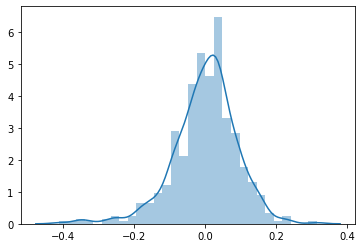

In [508]:
sns.distplot(res)

plt.show()

So,we can see that most of our residuals are centred around zero and almost follow a normal distribution 

### Making Predictions based on the final model

Applying the scaling on the test set

In [509]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter',
       'weather_Light Snow ', 'weather_Mist', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep'],
      dtype='object')

In [510]:
num_vars = ["temp","hum","windspeed" ,"cnt"]

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [511]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.249189,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dividing the test dataset into x_test and y_test

In [512]:
y_test = df_test.pop("cnt")
x_test = df_test

In [513]:
x_test.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weather_Light Snow ', 'weather_Mist', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep'],
      dtype='object')

In [514]:
x_train_rfe_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'weather_Light Snow ', 'weather_Mist',
       'weekday_Saturday', 'mnth_Sep'],
      dtype='object')

In [515]:
x_train_rfe_new = x_train_rfe_new.drop(["const"],axis=1)

In [516]:
x_train_rfe_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'weather_Light Snow ', 'weather_Mist',
       'weekday_Saturday', 'mnth_Sep'],
      dtype='object')

In [517]:
####Now dropping the same variables that we have dropped on the train set

x_test_new = x_test[x_train_rfe_new.columns]

In [518]:
###Adding a constant 
x_test_new = sm.add_constant(x_test_new)


In [519]:
### Making predictions

y_pred = lm_2.predict(x_test_new)

In [520]:
y_pred

184    0.431215
535    0.917475
299    0.386184
221    0.551491
152    0.565048
         ...   
400    0.290456
702    0.714126
127    0.457759
640    0.807743
72     0.253794
Length: 219, dtype: float64

In [521]:

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.7880219317877524